<h1>Model Evaluation and Refinement</h1>

In this notebook, I will determine how accurate the predictions made by the models developed are. 


Importing the data and the libraries

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

 First lets only use numeric data 

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


 Libraries for plotting 

In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<h2>Functions for plotting</h2>

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1>1) Training and Testing</h1>

In [8]:
y_data = df['price']

Drop price data in x data

In [9]:
x_data=df.drop('price',axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


In the above code, the testing set is set to 10% of the total dataset. 

Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.

In [11]:
from sklearn.linear_model import LinearRegression

Creating a Linear Regression object:

In [12]:
lre=LinearRegression()

Fitting the model using the feature horsepower 

In [13]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's Calculate the R^2 on the test data:

In [14]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

Here, R^2 is much smaller using the test data.

In [15]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

<h2>Cross-validation Score</h2>

Lets import <b>model_selection</b> from the module <b>cross_val_score</b>.

In [16]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv' will be set to 4. 

In [17]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:

In [18]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Calculating the average and standard deviation of our estimate:

In [19]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


Using negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'. 

In [20]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<h1>2) Overfitting, Underfitting and Model Selection</h1>


Let's create Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.

In [21]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Prediction using training data:

In [22]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

Prediction using test data: 

In [23]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.

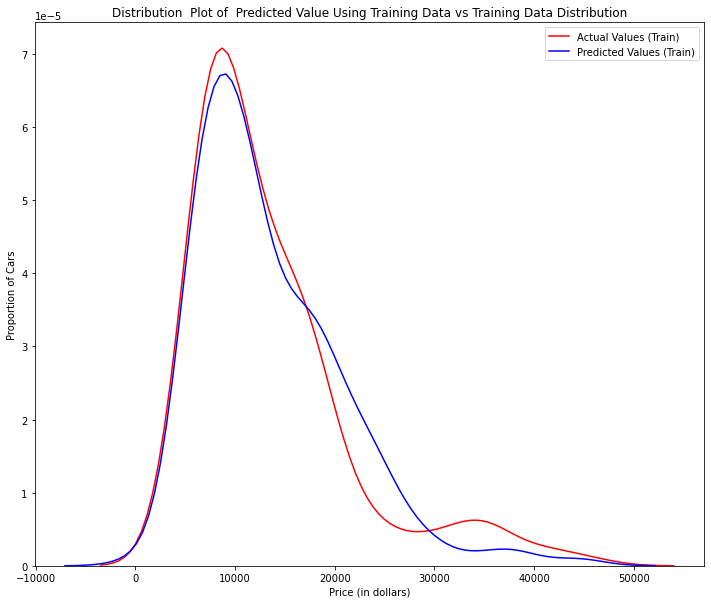

In [25]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

Repeating the above steps for test data -

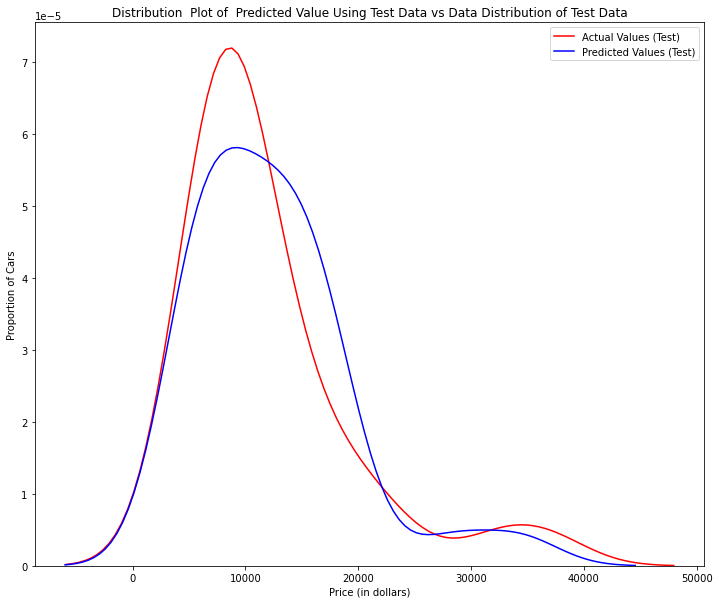

In [26]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 

<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

In [27]:
from sklearn.preprocessing import PolynomialFeatures

Let's use 55 percent of the data for testing and the rest for training:

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horse power'</b>. 

In [30]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

Now let's create a linear regression model "poly" and train it.

In [31]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can see the output of our model using the method  "predict." then assign the values to "yhat".

In [32]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 7422.98042213,  7806.232635  , 11277.19457752, 19950.53351258,
       20496.75475821])

Let's take the first five predicted values and compare it to the actual targets. 

In [33]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7422.98042213  7806.232635   11277.19457752 19950.53351258]
True values: [ 6295. 10698. 13860. 13499.]


Using the function "PollyPlot" to display the training data, testing data, and the predicted function.

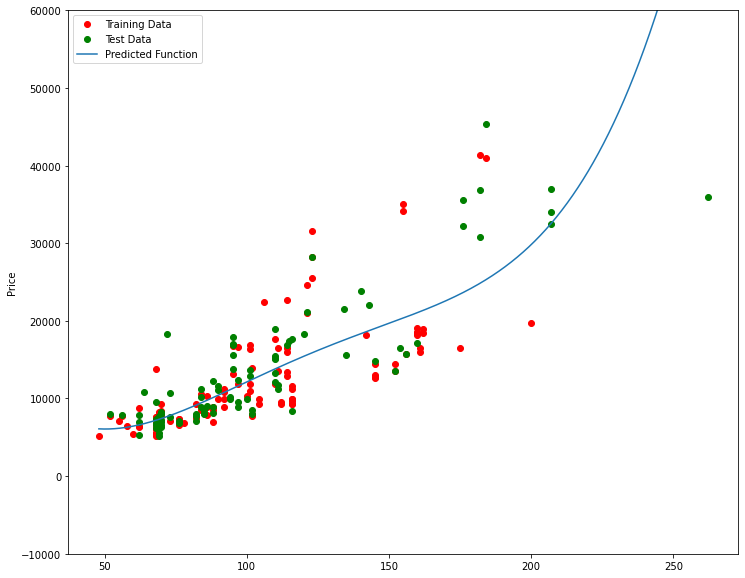

In [34]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 of the training data:

In [35]:
poly.score(x_train_pr, y_train)

0.5352483896755391

 R^2 of the test data:

In [36]:
poly.score(x_test_pr, y_test)

0.40639663604384924

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

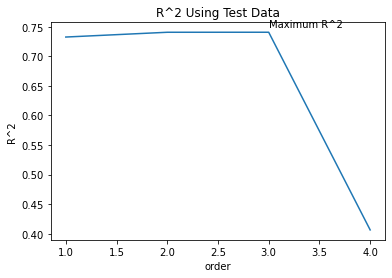

In [37]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

<h2>3) Ridge regression</h2> 

Note : Test data will be used as validation data.

 Let's perform a degree two polynomial transformation on our data. 

In [41]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

 Let's import  <b>Ridge</b>  from the module <b>linear models</b>.

In [42]:
from sklearn.linear_model import Ridge

Create a Ridge regression object and setting the regularization parameter to 0.1 

In [43]:
RigeModel=Ridge(alpha=0.1)

Fitting the model

In [44]:
RigeModel.fit(x_train_pr, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obtaining a prediction: 

In [45]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set 

In [46]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of Alfa that minimizes the test error, for example, we can use a for loop. 

In [47]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

We can plot out the value of R^2 for different Alphas 

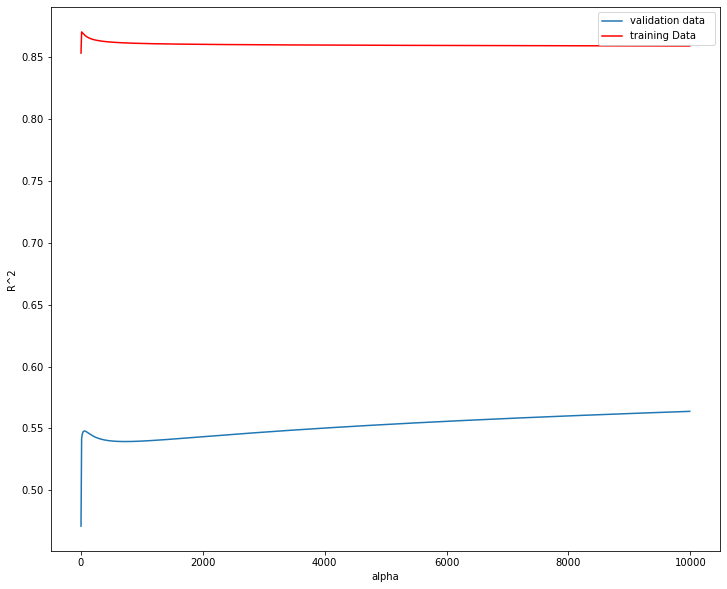

In [48]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 6:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

<h2> 4) Grid Search</h2>

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.

In [49]:
from sklearn.model_selection import GridSearchCV

Creating a dictionary of parameter values:

In [50]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creating a ridge regions object:

In [51]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Creating a ridge grid search object 

In [52]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fitting the model 

In [53]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Obtaining the estimator with the best parameters and assigning it to the variable BestRR:

In [54]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Testing our model on the test data 

In [55]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152